In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sys

In [2]:
alldata = pd.read_csv("../Data/alldata18-19.csv")
salarydata = pd.read_csv("../Data/salarystats.csv")
xval = "SALARY"
yval = "Salary by RPM"
X = alldata.loc[:, xval].values
X = np.reshape(X, (X.shape[0], 1))
X = np.append(X, np.reshape(salarydata.loc[:, yval].values, (salarydata.shape[0], 1)), axis = 1)

# X = alldata.loc[:, [xval, yval]].values

# X = salarydata.loc[:, [xval, yval]].values

In [3]:
# for i in range(X.shape[0]):
#     for j in range(X.shape[1]):
#         if(X[i][j]) == float('inf'):
#             X[i][j] = sys.maxsize

In [4]:
X

array([[ 3.04218540e+07,  4.06166275e+06],
       [ 3.05607000e+07,  1.79768824e+07],
       [ 2.41573030e+07,  2.34536922e+06],
       [ 2.54672500e+07,  6.68431759e+06],
       [ 3.74571540e+07,  7.93583771e+06],
       [ 2.31140670e+07,  4.53217000e+06],
       [ 3.31436500e+06,  1.27967761e+06],
       [ 3.00000000e+07,  6.04838710e+06],
       [ 2.79776890e+07,  8.91009204e+06],
       [ 1.20000000e+07,  9.52380952e+06],
       [ 2.54342630e+07,  8.47808767e+07],
       [ 3.20889320e+07, -7.82656878e+07],
       [ 7.83943500e+06,  3.69784670e+06],
       [ 2.00991890e+07,  6.58989803e+06],
       [ 3.11148000e+06, -8.18810526e+06],
       [ 1.95000000e+07, -9.28571429e+07],
       [ 3.56541500e+07,  9.79509615e+06],
       [ 1.89887250e+07, -5.75415909e+07],
       [ 8.64100000e+06, -1.15213333e+07],
       [ 2.23470150e+07, -7.98107679e+07],
       [ 2.77399750e+07, -1.99568165e+07],
       [ 6.56064000e+06,  1.53285981e+06],
       [ 2.59761110e+07,  8.35244727e+06],
       [ 7.

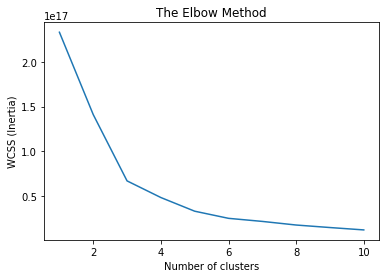

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

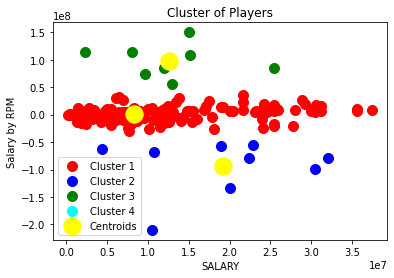

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Players')
plt.xlabel(xval)
plt.ylabel(yval)
plt.legend()
plt.show()

In [8]:
# salstats = salstats.sort_values(by=["Salary by PER"],ascending=True)
# salstats = salstats.set_index("NAME", drop=True)
# sortmetric = "PER"
# salstats = salstats.sort_values(by=["Salary by "+sortmetric],ascending=True)

In [9]:
# Salary by RPM vs Salary gives a bunch in the center and a few on top and below; take a closer look (label each point)